<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/Wastewater_Biological_Treatment(%E6%95%B8%E6%93%9A%E8%A6%96%E8%A6%BA%E5%8C%96%E5%88%86%E6%9E%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X: 導電度,溫度,液位,曝氣量,排泥量,MLSS,食微比



# Y:放流水量,PH,COD,SS,Phenol

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd
# 设置 pandas 显示选项
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

path = '/content/drive/MyDrive/專案工作承攬契約書_廢水生物處理/2.20210101-20220430資料(整理).xlsx'
df = pd.read_excel(path,index_col=0)
var1 = df.iloc[0,:].values
var2 = df.iloc[1,:].values
專有名詞對照表 = pd.concat([pd.Series(var1), pd.Series(var2)], axis=1).T
專有名詞對照表.index = ['詳細名稱', '英文名稱']
display(專有名詞對照表)
# 指定第一行為欄位名稱
df.columns = df.iloc[1]  
# 去掉前兩行因為是欄位名稱
df = df.iloc[2:]  
# cell都轉換成numeric
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
詳細名稱,T752入料量,T752溶氧,T752導電度計,T752溫度,T752 液位,T752曝氣量,放流水量,T-752食微比,T752排泥量,T751COD濃度,T751Phenol,T752MILSS,T752COD,放流水COD,放流水SS,放流水Phenol,T751正磷酸,T752正磷酸,T751氨氮,T752氨氮,T751_pH,T752_pH,放流水pH
英文名稱,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,T-752食微比,PHL-WS-FI7C05_PV,PHL_T751-COD_ppm,PHL_T751-PHL,PHL_T752-MLSS,PHL_S7512-COD_ppm,PHL_A771-COD_ppm,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH


日期,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,T-752食微比,PHL-WS-FI7C05_PV,PHL_T751-COD_ppm,PHL_T751-PHL,PHL_T752-MLSS,PHL_S7512-COD_ppm,PHL_A771-COD_ppm,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH
2021-01-01 00:00:00,30.954139,2.748208,13454.707783,30.738966,82.837878,1322.159831,171.755781,0.074793,7.920856,2366.666667,5.000000,4729.128053,41.000000,41.000000,12.833333,0.0,21.633334,2.386667,20.550000,0.891667,7.700000,8.083334,8.383333
2021-01-02 00:00:00,31.155222,2.503246,13309.705981,30.492182,82.828679,1299.586141,175.419489,0.085769,7.951025,2696.666667,5.083333,4729.470441,40.333333,38.333333,12.333333,0.0,22.270000,2.010000,20.601111,0.446667,7.716667,8.000000,8.300000
2021-01-03 00:00:00,30.948144,2.119857,13312.370351,30.441738,82.883022,1275.992065,169.424186,0.085614,7.895686,2710.000000,5.833333,4729.812828,41.666667,42.333333,14.500000,0.0,24.310001,1.871667,19.680000,0.171667,7.850000,8.016667,8.316667
2021-01-04 00:00:00,33.247575,1.300810,13396.259431,30.483045,82.905756,1298.938517,208.076129,0.097059,7.904003,2860.000000,5.166667,4730.155216,38.333333,49.666667,16.500000,0.0,22.606667,1.431667,19.422222,0.144444,8.116667,8.083334,8.400000
2021-01-05 00:00:00,32.230836,1.900386,13604.773082,30.641047,82.901661,1334.388753,182.204378,0.095510,7.937889,2903.333333,6.750000,4730.497603,38.333333,37.666667,14.000000,0.0,21.743333,1.405000,19.848888,0.172222,8.183333,8.016667,8.400000


# 缺失值檢查

In [109]:
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/c92f4651ccbd0640c2a8c97c017092d9/raw/adedbf1159e92402f32b8d961f6db70a1b0c95ad/DataPreprocessingArmory.py'
exec(requests.get(url).text)
missing_values_table(df)

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values
日期,,


# 視覺化檢查

為了確保圖表方便觀察我們將數據做

1.standscaler or MinMax縮放

2.平滑化

3.擷取一小段時間段出來

日期
PHL-WS-AT7C02_PV        2607.178084
PHL_T751-COD_ppm         493.495149
PHL_T752-MLSS            419.259764
PHL-WS-FIT7C04_PV        105.903843
PHL_T751-PHL              70.973750
PHL_S7511-NH3             66.022110
PHL-WS-FI7E01_PV          19.523948
PHL_S7512-COD_ppm          8.425497
PHL_A771-COD_ppm           5.371048
PHL-WS-FI7C01_PV           3.609089
PHL_S7511-PO4              3.507764
PHL_A771-SS                3.128031
PHL-WS-TT7C09_PV           2.994273
PHL-WS-FI7C05_PV           2.086127
PHL_A771-PHL               1.900236
PHL_S7512-PO4              0.930502
PHL-WS-AT7C03_PV           0.816134
PHL_T751-pH                0.409041
PHL_S7512-pH               0.327552
PHL-WS-T752-LEVEL_PV       0.242447
PHL_S7512-NH3              0.198103
PHL_A771-pH                0.178254
T-752食微比                   0.017763
Name: std, dtype: float64

平滑化滑動窗格SIZE: 48


<Axes: >

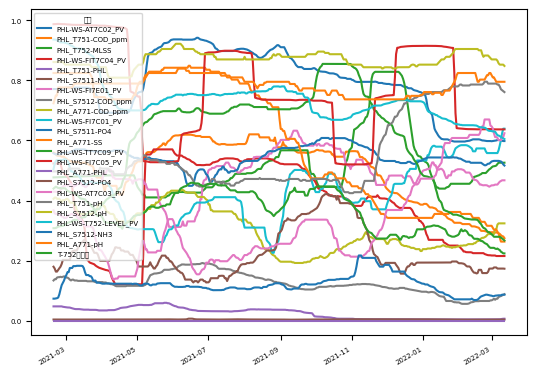

In [110]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')
ss = MinMaxScaler()
display(df.describe().loc['std'].sort_values(ascending=False))
temp_df = df[df.describe().loc['std'].sort_values(ascending=False)[:].index.tolist()]
#standscaler縮放
temp_df[:] = ss.fit_transform(temp_df[:])
#平滑化:平滑化滑動窗格SIZE暫時訂為資料筆數的10%
平滑化滑動窗格SIZE = int(len(temp_df)*0.10)
print('平滑化滑動窗格SIZE:',平滑化滑動窗格SIZE)
temp_df[:] = temp_df[:].rolling(平滑化滑動窗格SIZE).median()
#擷取一小段時間段出來[0%~100%]中選取[?%~?%]的資料
idx1 = int(len(temp_df)*0.1)
idx2 = int(len(temp_df)*0.9)
temp_df = temp_df.iloc[idx1:idx2]
display(temp_df.plot())

# 皮爾森相關性檢查(不管正相關或是負相關只管相關性強弱)

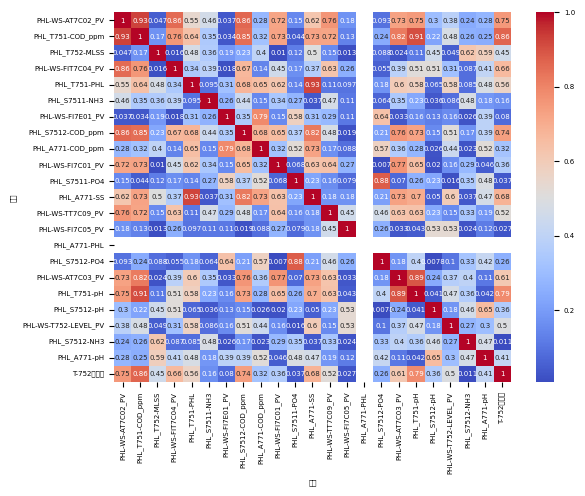

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})

# 計算皮爾森相關係數矩陣的絕對值
corr_matrix_abs = abs(temp_df.corr(method='pearson'))

# 繪製相關係數矩陣圖
sns.heatmap(corr_matrix_abs, annot=True, cmap='coolwarm')

# 顯示圖表
plt.show()

# 將相關係數矩陣中大於0.7的部份特別擷取出來

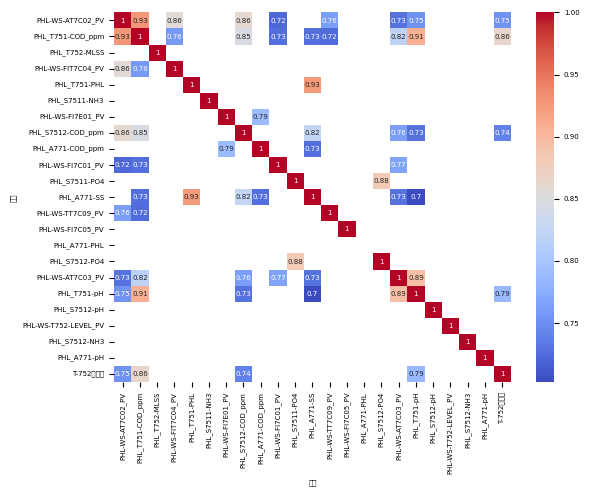

In [112]:
import numpy as np
import seaborn as sns

# 計算皮爾森相關係數矩陣
corr_matrix_abs = abs(temp_df.corr(method='pearson'))

# 將相關係數矩陣中小於0.7的元素設置為NaN
corr_matrix_abs[corr_matrix_abs < 0.7] = np.nan

# 繪製相關係數矩陣圖
sns.heatmap(corr_matrix_abs, annot=True, cmap='coolwarm')

# 顯示圖表
plt.show()


# 將高相關性的因子,繪製出來觀察因子間的趨勢

PHL-WS-AT7C02_PV 與 PHL_T751-COD_ppm 的相關係數為: 0.9269752565721741


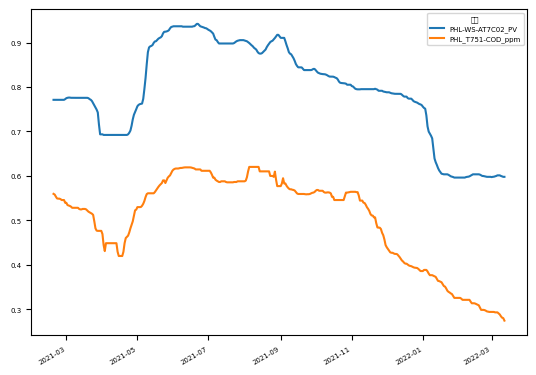

PHL-WS-AT7C02_PV 與 PHL-WS-FIT7C04_PV 的相關係數為: 0.8562043252920674


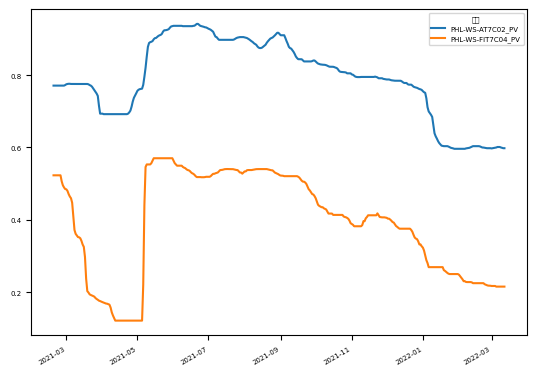

PHL-WS-AT7C02_PV 與 PHL_S7512-COD_ppm 的相關係數為: 0.860647284343643


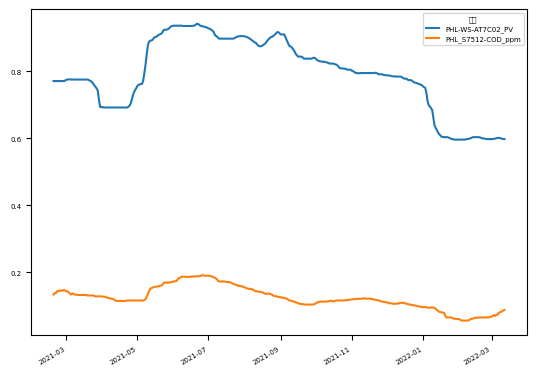

PHL-WS-AT7C02_PV 與 PHL-WS-FI7C01_PV 的相關係數為: -0.7218600799561705


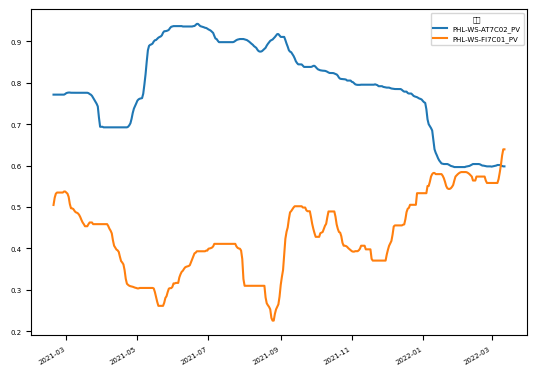

PHL-WS-AT7C02_PV 與 PHL-WS-TT7C09_PV 的相關係數為: 0.7618076316006854


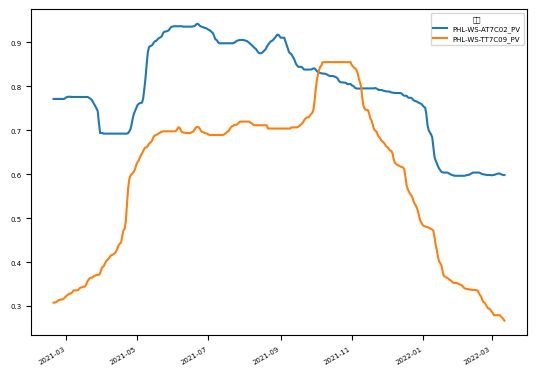

PHL-WS-AT7C02_PV 與 PHL-WS-AT7C03_PV 的相關係數為: -0.7287039867157


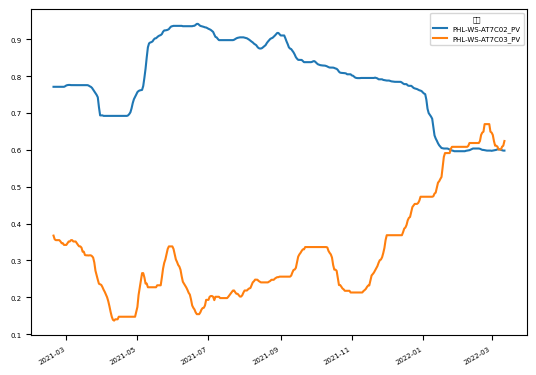

PHL-WS-AT7C02_PV 與 PHL_T751-pH 的相關係數為: -0.7515908292860982


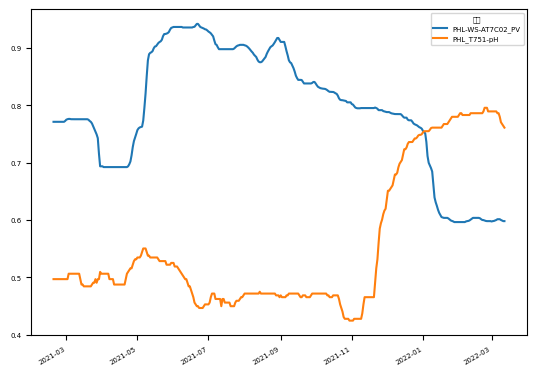

PHL-WS-AT7C02_PV 與 T-752食微比 的相關係數為: 0.7525448268702947


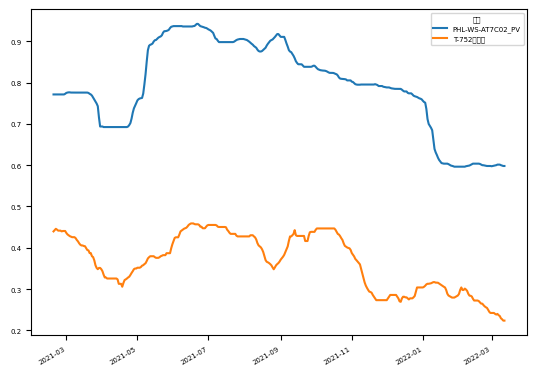

PHL_T751-COD_ppm 與 PHL-WS-FIT7C04_PV 的相關係數為: 0.7576402492145033


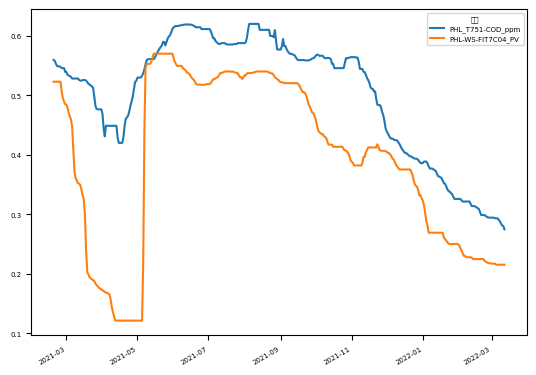

PHL_T751-COD_ppm 與 PHL_S7512-COD_ppm 的相關係數為: 0.8458406694095646


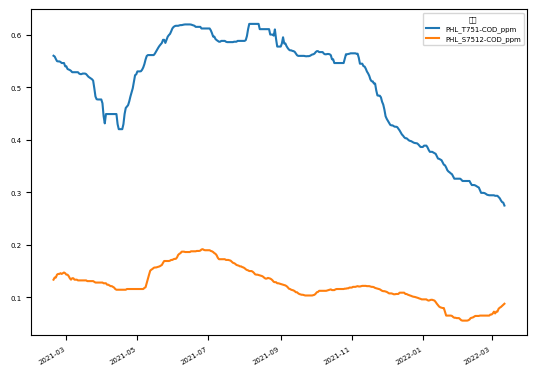

PHL_T751-COD_ppm 與 PHL-WS-FI7C01_PV 的相關係數為: -0.7261399082446425


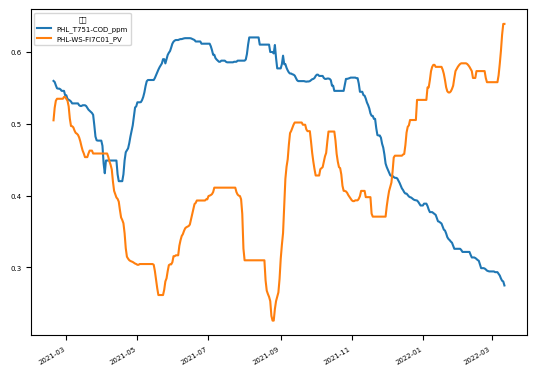

PHL_T751-COD_ppm 與 PHL_A771-SS 的相關係數為: 0.726264273341342


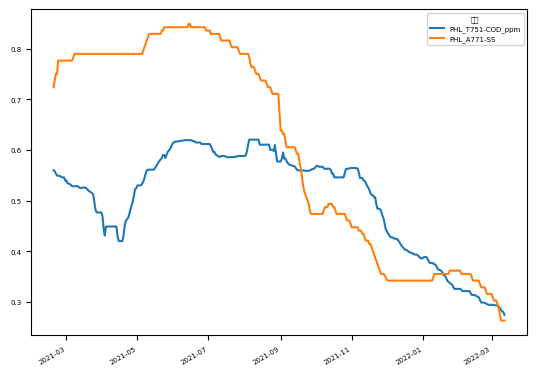

PHL_T751-COD_ppm 與 PHL-WS-TT7C09_PV 的相關係數為: 0.723900281312574


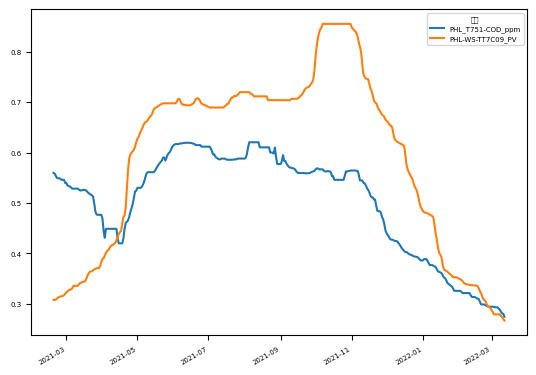

PHL_T751-COD_ppm 與 PHL-WS-AT7C03_PV 的相關係數為: -0.8191908708731557


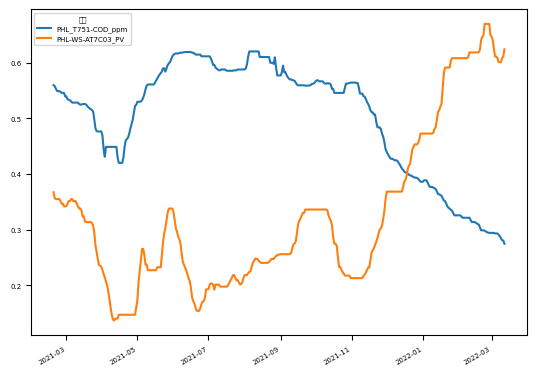

PHL_T751-COD_ppm 與 PHL_T751-pH 的相關係數為: -0.907734496308624


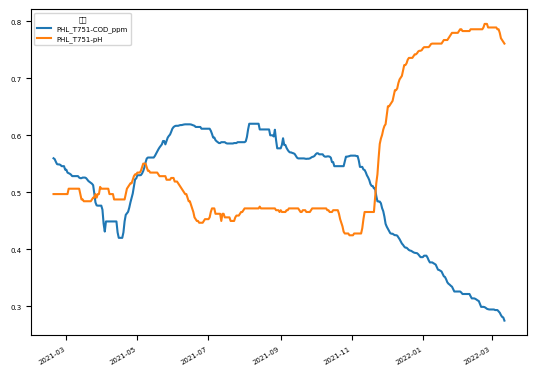

PHL_T751-COD_ppm 與 T-752食微比 的相關係數為: 0.8649614127080454


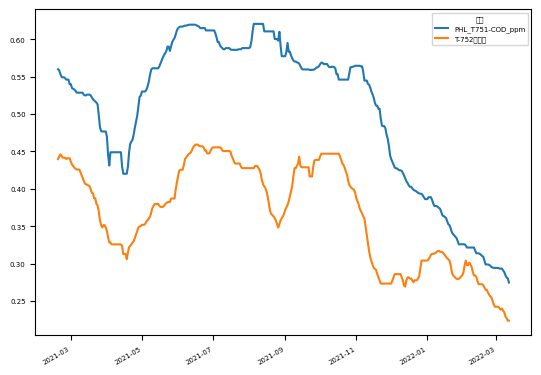

PHL_T751-PHL 與 PHL_A771-SS 的相關係數為: 0.9252180961968313


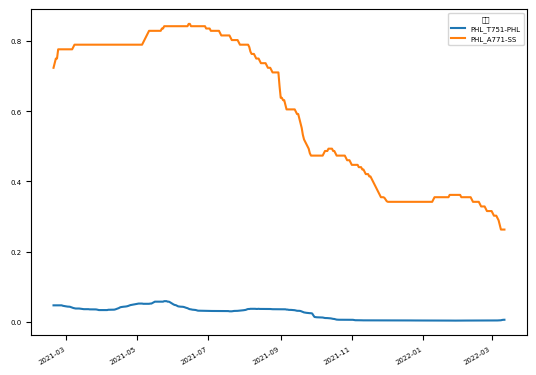

PHL-WS-FI7E01_PV 與 PHL_A771-COD_ppm 的相關係數為: -0.7889973918280658


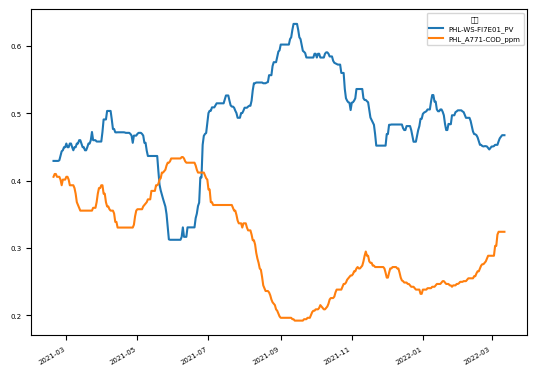

PHL_S7512-COD_ppm 與 PHL_A771-SS 的相關係數為: 0.8237868982274655


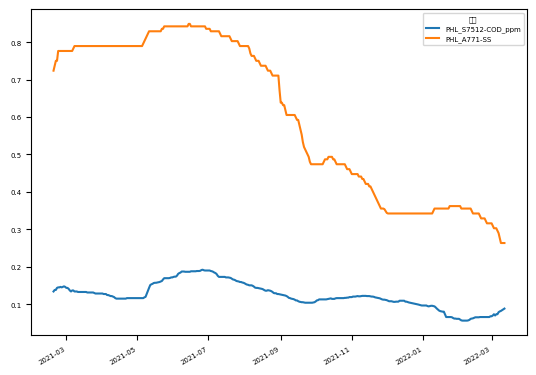

PHL_S7512-COD_ppm 與 PHL-WS-AT7C03_PV 的相關係數為: -0.7627582024638033


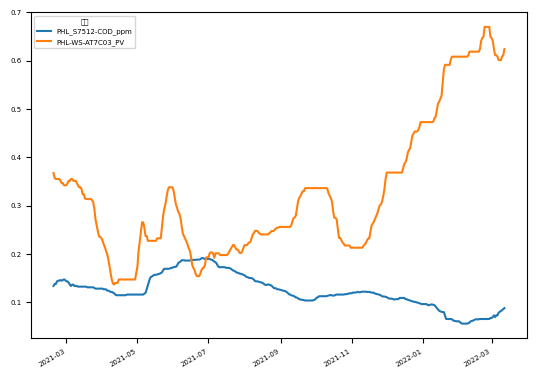

PHL_S7512-COD_ppm 與 PHL_T751-pH 的相關係數為: -0.7281493827702522


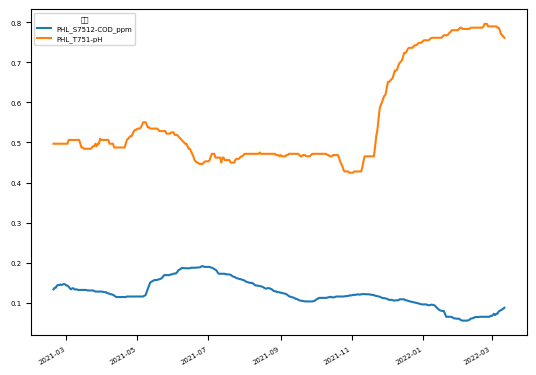

PHL_S7512-COD_ppm 與 T-752食微比 的相關係數為: 0.7398321543015334


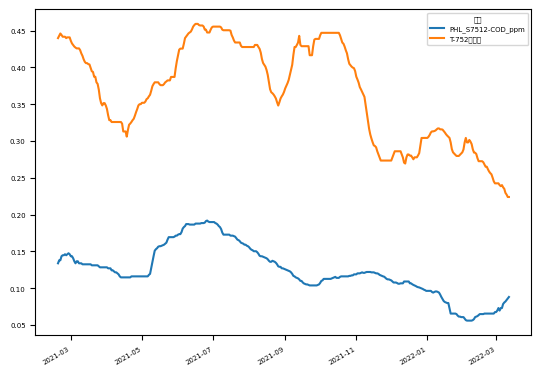

PHL_A771-COD_ppm 與 PHL_A771-SS 的相關係數為: 0.7267367152202454


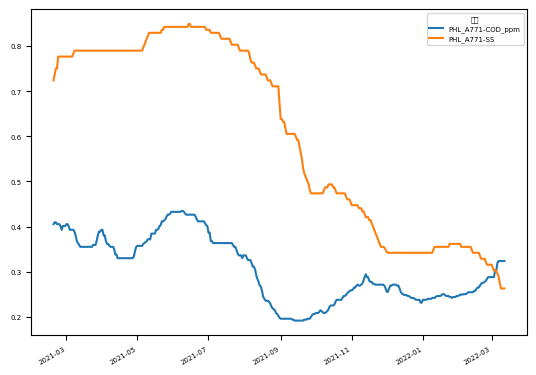

PHL-WS-FI7C01_PV 與 PHL-WS-AT7C03_PV 的相關係數為: 0.7671583367529521


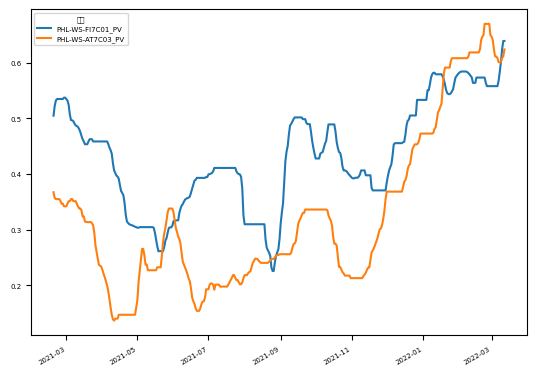

PHL_S7511-PO4 與 PHL_S7512-PO4 的相關係數為: 0.8820766897773097


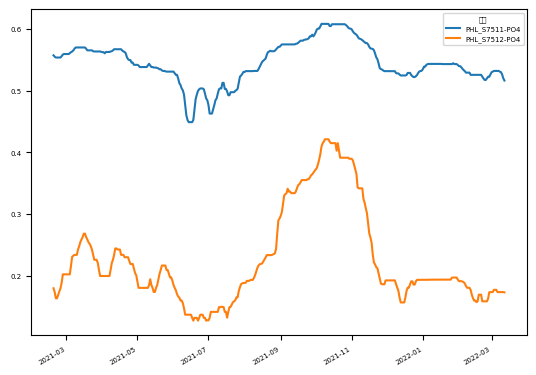

PHL_A771-SS 與 PHL-WS-AT7C03_PV 的相關係數為: -0.7289468828014435


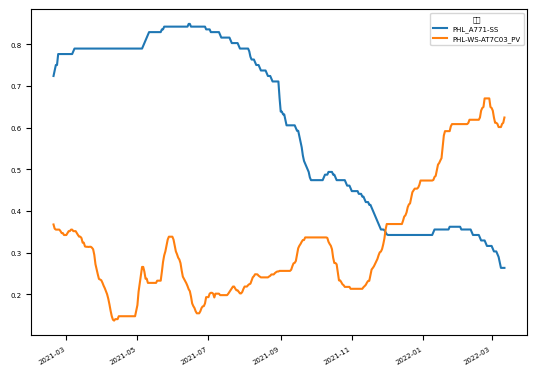

PHL_A771-SS 與 PHL_T751-pH 的相關係數為: -0.7024993255415554


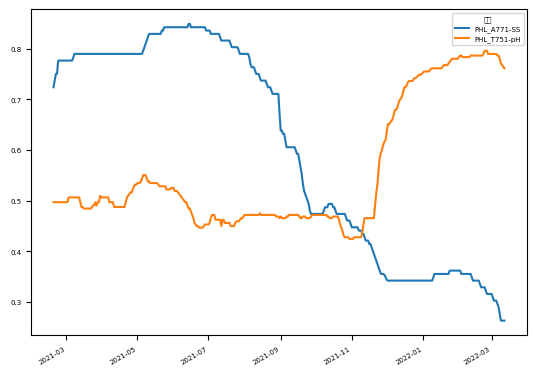

PHL-WS-AT7C03_PV 與 PHL_T751-pH 的相關係數為: 0.8944196536028852


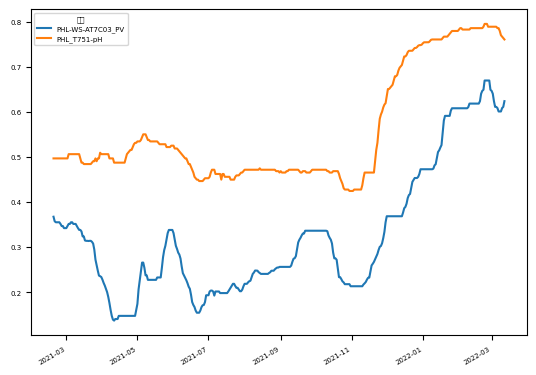

PHL_T751-pH 與 T-752食微比 的相關係數為: -0.7863700614157455


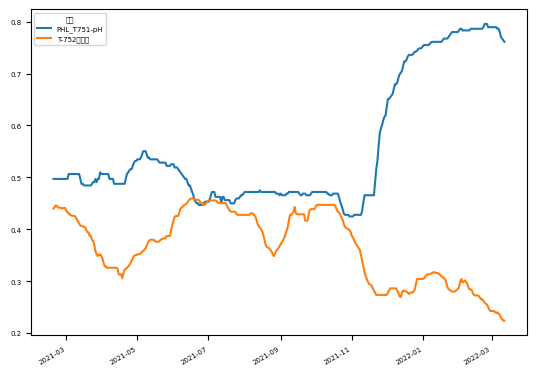

In [113]:
import numpy as np

# 計算皮爾森相關係數矩陣
corr_matrix_abs = abs(temp_df.corr(method='pearson'))

# 將相關係數矩陣中小於0.7的元素設置為0
corr_matrix_abs[corr_matrix_abs < 0.7] = 0

# 尋找大於0.7的元素的索引
row, col = np.where(corr_matrix_abs > 0.7)

# 列舉出相關係數大於0.7的欄位對
high_corr_cols_list = []
for r, c in zip(row, col):
    if r < c:  # 避免列舉相同的欄位對
        #計算係數
        係數 = temp_df[[temp_df.columns[r],temp_df.columns[c]]].corr().iloc[1,0]
        print(temp_df.columns[r], '與', temp_df.columns[c], '的相關係數為:',係數)
        temp_df[[temp_df.columns[r],temp_df.columns[c]]].plot()
        high_corr_cols_list.append(temp_df.columns[r])
        high_corr_cols_list.append(temp_df.columns[c])
        plt.show()


# 盒鬚圖檢查

[Text(1, 0, 'PHL-WS-AT7C02_PV'),
 Text(2, 0, 'PHL_T751-COD_ppm'),
 Text(3, 0, 'PHL_T752-MLSS'),
 Text(4, 0, 'PHL-WS-FIT7C04_PV'),
 Text(5, 0, 'PHL_T751-PHL'),
 Text(6, 0, 'PHL_S7511-NH3'),
 Text(7, 0, 'PHL-WS-FI7E01_PV'),
 Text(8, 0, 'PHL_S7512-COD_ppm'),
 Text(9, 0, 'PHL_A771-COD_ppm'),
 Text(10, 0, 'PHL-WS-FI7C01_PV'),
 Text(11, 0, 'PHL_S7511-PO4'),
 Text(12, 0, 'PHL_A771-SS'),
 Text(13, 0, 'PHL-WS-TT7C09_PV'),
 Text(14, 0, 'PHL-WS-FI7C05_PV'),
 Text(15, 0, 'PHL_A771-PHL'),
 Text(16, 0, 'PHL_S7512-PO4'),
 Text(17, 0, 'PHL-WS-AT7C03_PV'),
 Text(18, 0, 'PHL_T751-pH'),
 Text(19, 0, 'PHL_S7512-pH'),
 Text(20, 0, 'PHL-WS-T752-LEVEL_PV'),
 Text(21, 0, 'PHL_S7512-NH3'),
 Text(22, 0, 'PHL_A771-pH'),
 Text(23, 0, 'T-752食微比')]

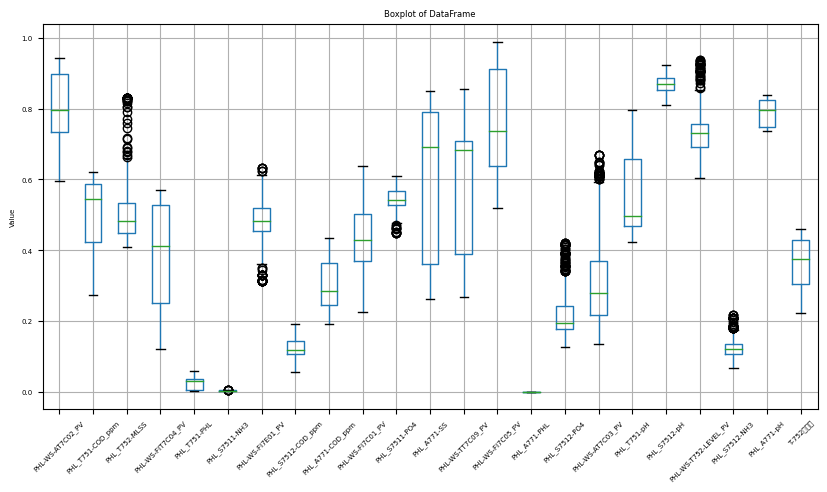

In [114]:
# 繪製DataFrame的盒鬚圖
fig, ax = plt.subplots(figsize=(10, 5))
temp_df.boxplot(ax=ax)
# 設置標題和標籤
ax.set_title('Boxplot of DataFrame')
ax.set_ylabel('Value')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


# 現在來看看每個Y對應X的特徵重要度(features importance)

X : 導電度,溫度,液位,曝氣量,排泥量,MLSS,食微比

Y : 放流水量,PH,COD,SS,Phenol

,詳細名稱,英文名稱
0,T752入料量,PHL-WS-FI7C01_PV
1,T752溶氧,PHL-WS-AT7C03_PV
2,T752導電度計,PHL-WS-AT7C02_PV
3,T752溫度,PHL-WS-TT7C09_PV
4,T752 液位,PHL-WS-T752-LEVEL_PV
5,T752曝氣量,PHL-WS-FIT7C04_PV
6,放流水量,PHL-WS-FI7E01_PV
7,T-752食微比,T-752食微比
8,T752排泥量,PHL-WS-FI7C05_PV
9,T751COD濃度,PHL_T751-COD_ppm


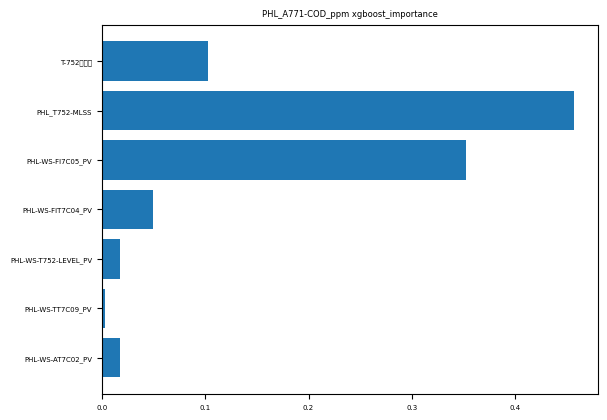

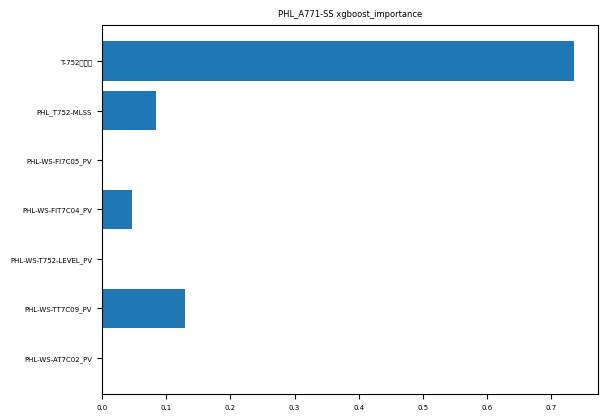

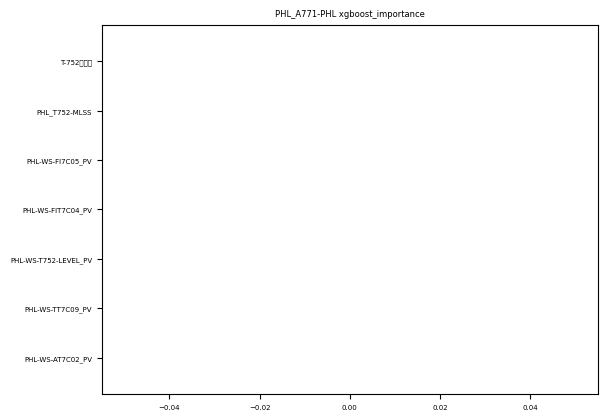

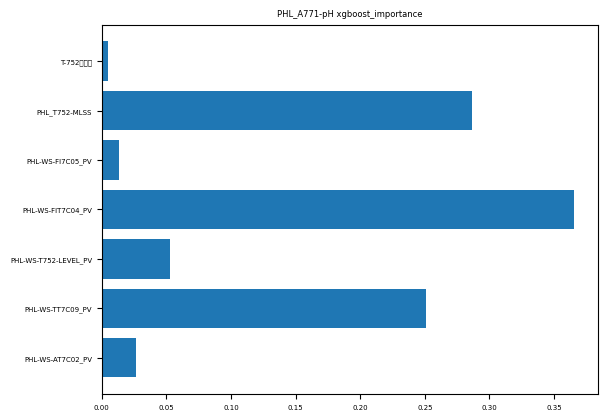

In [115]:
display(專有名詞對照表.T)
from xgboost import XGBRegressor
def xgboost_importance_plot(X,y,xgb_model,features_names_list,y_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_model.feature_importances_
    plt.barh(features_names_list, xgb_model.feature_importances_)
    plt.title(f'{y_name} xgboost_importance')
    plt.show()
x_col = ['PHL-WS-AT7C02_PV','PHL-WS-TT7C09_PV','PHL-WS-T752-LEVEL_PV','PHL-WS-FIT7C04_PV','PHL-WS-FI7C05_PV','PHL_T752-MLSS','T-752食微比']
y_col = ['PHL_A771-COD_ppm','PHL_A771-SS','PHL_A771-PHL','PHL_A771-pH']
for y_name in y_col:
  xgboost_importance_plot(
      X = temp_df[x_col],
      y = temp_df[y_name],
      xgb_model = XGBRegressor(),
      features_names_list = x_col,
      y_name = y_name
      )